# Regression With Tensorflow (House Prices)
Let's predict some house prices

In [1]:
## Determine if we are running on google colab

try:
    import google.colab
    RUNNING_IN_COLAB = True
except:
    RUNNING_IN_COLAB = False

print ("Running in Google COLAB : ", RUNNING_IN_COLAB)


Running in Google COLAB :  False


In [2]:
from __future__ import absolute_import, division, print_function

%matplotlib inline

import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras

## Step 1 : Read Data

In [3]:
#data_location = '../data/house-prices/house-sales-full.csv'
data_location = 'https://elephantscale-public.s3.amazonaws.com/data/house-prices/house-sales-full.csv'

if RUNNING_IN_COLAB:
    data_location = 'https://elephantscale-public.s3.amazonaws.com/data/house-prices/house-sales-full.csv'

house_prices = pd.read_csv(data_location)
house_prices

,DocumentID,Date,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
0,1,9/16/14,280000,1000102,Multiplex,9/1/14,405100,0.930836,300805.0,2,...,3.00,6,7,1991,0,0,70000,229000,98002,False
1,2,6/16/06,1000000,1200013,Single Family,6/1/06,404400,0.929228,1076162.0,1,...,3.75,4,10,2005,0,0,203000,590000,98166,True
2,3,1/29/07,745000,1200019,Single Family,1/1/07,425600,0.977941,761805.0,1,...,1.75,4,8,1947,0,0,183000,275000,98166,False
3,4,2/25/08,425000,2800016,Single Family,2/1/08,418400,0.961397,442065.0,1,...,3.75,5,7,1966,0,0,104000,229000,98168,False
4,5,3/29/13,240000,2800024,Single Family,3/1/13,351600,0.807904,297065.0,1,...,1.75,4,7,1948,0,0,104000,205000,98168,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27058,27059,10/31/12,374000,9895000030,Townhouse,10/1/12,332400,0.763787,489665.0,1,...,1.75,2,9,2011,0,0,147000,269000,-1,False
27059,27060,12/7/12,374000,9895000040,Townhouse,12/1/12,339400,0.779871,479566.0,1,...,1.75,2,9,2011,0,0,147000,269000,-1,True
27060,27061,7/9/12,165000,9899200010,Single Family,7/1/12,325300,0.747472,220744.0,1,...,1.00,4,6,1971,0,0,92000,130000,98055,False
27061,27062,5/26/06,315000,9900000355,Single Family,5/1/06,400600,0.920496,342207.0,1,...,2.00,3,7,1939,0,0,103000,212000,98166,False


## Step 2 : Cleanup Data

In [4]:
print("original row count : ", house_prices.shape)
house_prices = house_prices.dropna()
print ("cleaned up row count : ", house_prices.shape)

original row count :  (27063, 23)
cleaned up row count :  (27063, 23)


## Step 3 : Exploratory Data Analysis (EDA)
EDA will give us a sense of data.  It is highly recommended that you do this before learning.

**==> Q : What is max number of bedrooms? :-)**

In [5]:
## get a summary of data
pd.options.display.float_format = '{:,.2f}'.format

## TODO : use 'describe()' function to get summary info
house_prices.describe().T

,count,mean,std,min,25%,50%,75%,max
DocumentID,"27,063.00","13,532.00","7,812.56",1.00,"6,766.50","13,532.00","20,297.50","27,063.00"
SalePrice,"27,063.00","511,626.20","342,821.17","3,000.00","329,000.00","425,000.00","590,000.00","11,000,000.00"
PropertyID,"27,063.00","4,680,324,882.08","2,896,350,979.15","1,000,102.00","2,213,000,057.50","3,972,900,140.00","7,504,001,385.00","9,906,000,035.00"
zhvi_px,"27,063.00","390,750.58","37,024.46","311,600.00","357,100.00","400,600.00","421,200.00","435,200.00"
zhvi_idx,"27,063.00",0.90,0.09,0.72,0.82,0.92,0.97,1.00
AdjSalePrice,"27,063.00","570,918.76","380,236.63","3,368.00","366,918.50","475,664.00","655,061.00","11,644,855.00"
NbrLivingUnits,"27,063.00",1.02,0.15,1.00,1.00,1.00,1.00,5.00
SqFtLot,"27,063.00","10,997.68","28,110.66",494.00,"4,257.50","6,636.00","9,450.00","1,024,068.00"
SqFtTotLiving,"27,063.00","2,122.96",939.84,370.00,"1,440.00","1,940.00","2,610.00","10,740.00"
SqFtFinBasement,"27,063.00",275.30,428.71,0.00,0.00,0.00,510.00,"3,500.00"


## Step 4 : Choose Columns to consider
Which attributes do you think are important in deciding SalePrice?

In [6]:
## TODO-Later : Experiment with this, 
## select columns you think are important in determining SalePrice
## Hint : Start with : 'Bedrooms', 'Bathrooms', 'SqFtTotLiving', 'SqFtLot'
input_columns = ['Bedrooms', 'Bathrooms', 'SqFtTotLiving', 'SqFtLot']
label_column = 'SalePrice'

## Step 5: Remove Outliers
As you can see we have a few outliers.  
Let's remove them by considering only houses with less than 5 BR

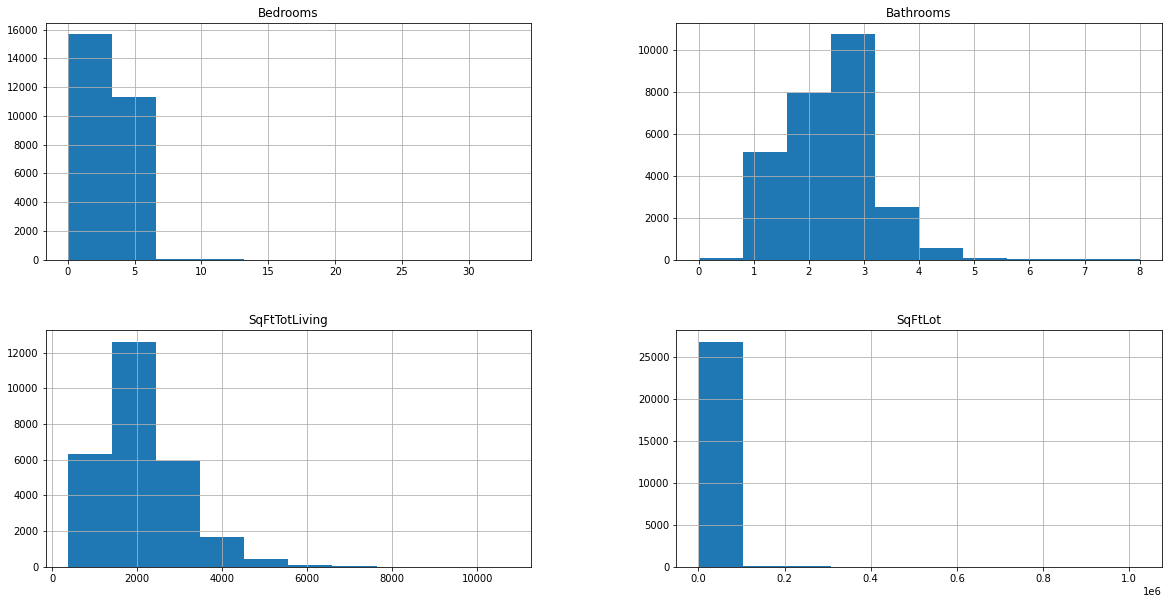

In [7]:
house_prices[input_columns].hist(figsize=(20,10));

In [8]:
## TODO-Later : commented out for now, 
##        uncomment during tuning phase

# house_prices = house_prices[house_prices['Bedrooms'] <= 5]
# house_prices

In [9]:
## Shape data 

# x = house_prices.loc[:, input_columns]
x = house_prices [input_columns]
y = house_prices[[label_column]]

print(x.head())
print ('--------')
print (y.head())

   Bedrooms  Bathrooms  SqFtTotLiving  SqFtLot
0         6       3.00           2400     9373
1         4       3.75           3764    20156
2         4       1.75           2060    26036
3         5       3.75           3200     8618
4         4       1.75           1720     8620
--------
   SalePrice
0     280000
1    1000000
2     745000
3     425000
4     240000


## Step 6 :  Split data into train /test

In [10]:
from sklearn.model_selection import train_test_split

## TODO split train/test = 80% / 20%
## Hint : test_size=0.2  (representing 20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_train_orig = x_train
x_test_orig = x_test

print ("x_train.shape : ", x_train.shape)
print ("y_train.shape : ", y_train.shape)
print ("x_test.shape : ", x_test.shape)
print ("y_test.shape : ", y_test.shape)

x_train.shape :  (21650, 4)
y_train.shape :  (21650, 1)
x_test.shape :  (5413, 4)
y_test.shape :  (5413, 1)


## Step 7 : Scale Data

In [11]:
# ## TODO-Later To turn off scaling, comment this cell out

# def my_scaler(df):
#     #return (df-df.min())/(df.max()-df.min())  ## this is min/max scaler
#     return (df - df.mean()) / df.std()

# print ("x_train: before and after")
# print(x_train_orig.head())
# x_train = my_scaler(x_train_orig)
# print(x_train.head())

# print ('-----')
# print ('x_test: before / after')
# print (x_test_orig.head())
# x_test = my_scaler (x_test_orig)
# print (x_test.head())

## Step 8:  Build a Model

Build a 3 layer network
- input (64 neurons)
- hidden (64 neurons)
- output (1 neuron)

input_dim :  4


2022-06-14 07:10:01.258505: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 64)                320       
_________________________________________________________________
hidden_2 (Dense)             (None, 32)                2080      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________
None


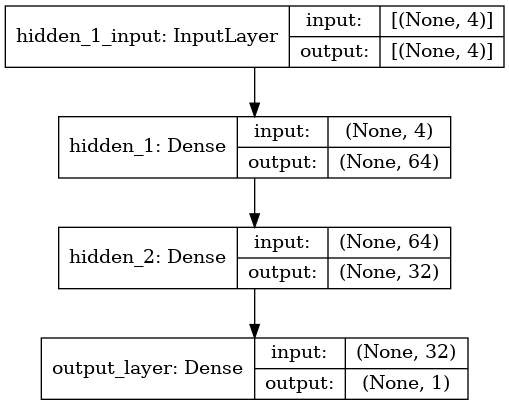

In [12]:
input_dim = len(x_train.keys())
print ("input_dim : ", input_dim)

## TODO : define a a model
##   - add 64 neurons (units=64) for 'input_layer'  and 'hidden_1' layer
##   - final outupt layer has ONE neuron  (units=1)
model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=64, activation=tf.nn.relu, input_shape=[input_dim], name="hidden_1"),
            tf.keras.layers.Dense(units=32, activation=tf.nn.relu, name="hidden_2"),
            tf.keras.layers.Dense(units=1, name="output_layer")
        ])

## TODO : We start with RMSProp.  Feel free to try other optimizers
optimizer = tf.keras.optimizers.RMSprop(0.01)

model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mean_absolute_error', 'mean_squared_error'])

print (model.summary())

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

## Step 9:  Train

In [13]:
%%time

## TODO start with 10, try 50, 100
epochs = 100

print ("training starting ...")
history = model.fit(x_train, y_train, epochs=epochs)

print ("training done.")

##TODO : how long is the training taking?

training starting ...
Epoch 1/100


2022-06-14 07:10:02.635650: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


677/677 [==============================] - 2s 2ms/step - loss: 103758381056.0000 - mean_absolute_error: 192763.7500 - mean_squared_error: 103758381056.0000
Epoch 2/100
677/677 [==============================] - 1s 2ms/step - loss: 62182715392.0000 - mean_absolute_error: 150743.2656 - mean_squared_error: 62182715392.0000
Epoch 3/100
677/677 [==============================] - 1s 2ms/step - loss: 62475530240.0000 - mean_absolute_error: 149732.0938 - mean_squared_error: 62475530240.0000
Epoch 4/100
677/677 [==============================] - 1s 2ms/step - loss: 62135627776.0000 - mean_absolute_error: 149264.0625 - mean_squared_error: 62135627776.0000
Epoch 5/100
677/677 [==============================] - 1s 2ms/step - loss: 62333857792.0000 - mean_absolute_error: 148881.5938 - mean_squared_error: 62333857792.0000
Epoch 6/100
677/677 [==============================] - 1s 2ms/step - loss: 61916295168.0000 - mean_absolute_error: 149056.9062 - mean_squared_error: 61916295168.0000
Epoch 7/100
67

## Step 10: History

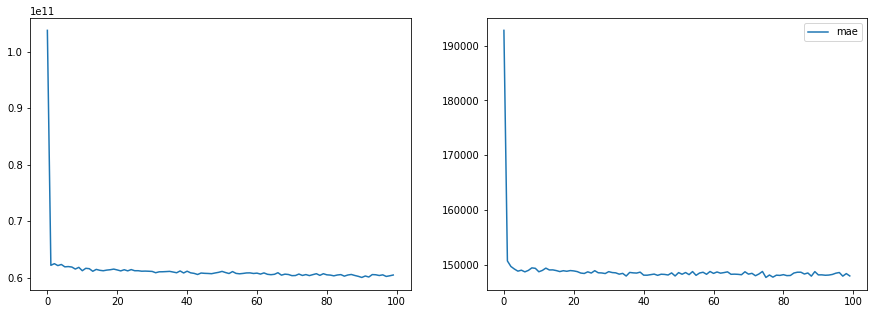

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['mean_squared_error'], label='mse')
plt.subplot(1,2,2)
plt.plot(history.history['mean_absolute_error'], label='mae')
plt.legend()
plt.show()

## Step 11 : Evaluate Model

In [15]:
metric_names = model.metrics_names
print ("model metrics : " , metric_names)
metrics = model.evaluate(x_test, y_test, verbose=0)

for idx, metric in enumerate(metric_names):
    print ("Metric : {} = {:,.2f}".format (metric_names[idx], metrics[idx]))

model metrics :  ['loss', 'mean_absolute_error', 'mean_squared_error']
Metric : loss = 72,821,645,312.00
Metric : mean_absolute_error = 141,419.86
Metric : mean_squared_error = 72,821,645,312.00


## Step 12: Predict

In [16]:
y_pred = model.predict(x_test)
print (x_test)
print(y_pred)

       Bedrooms  Bathrooms  SqFtTotLiving  SqFtLot
6925          3       1.75           1350     8742
10580         5       3.00           2460     9975
13379         3       2.50           2260     5220
1132          2       1.50            830     1034
20942         5       1.75           2040     8040
...         ...        ...            ...      ...
3818          4       1.75           1890     4800
22803         3       2.75           2660    10004
20370         3       2.50           2130     2520
4536          3       2.50           2520     3750
10743         4       2.50           3060     6272

[5413 rows x 4 columns]
[[319631.8 ]
 [542899.1 ]
 [493335.94]
 ...
 [478572.5 ]
 [549434.44]
 [668710.6 ]]


## Step 13: Evalute prediction output
Let's do a pd dataframe and do some plots

In [17]:
predictions_df = pd.DataFrame(x_test_orig)  # use the original one, not scaled
predictions_df['actual_price'] = y_test
predictions_df['predicted_price'] = y_pred
predictions_df['error'] = predictions_df['actual_price'] - predictions_df['predicted_price'] 

pd.options.display.float_format = '{:,.2f}'.format
## print sample to see different data every time
predictions_df.sample(frac=0.1)
## or just print the first few
# predictions_df

,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,actual_price,predicted_price,error
7367,3,1.50,1160,17185,256900,"253,937.73","2,962.27"
18356,3,2.50,3010,5261,659950,"665,992.69","-6,042.69"
19232,4,2.25,2660,17251,575000,"650,351.81","-75,351.81"
23778,2,2.00,1510,3904,421000,"329,479.16","91,520.84"
25209,3,2.50,2510,8965,351000,"567,764.69","-216,764.69"
...,...,...,...,...,...,...,...
2652,2,1.50,1200,1687,423000,"254,999.42","168,000.58"
11850,5,3.25,4230,10000,879000,"934,910.12","-55,910.12"
14276,3,2.50,3080,13870,723750,"728,919.25","-5,169.25"
2894,3,1.50,2020,13903,295000,"494,058.84","-199,058.84"


In [18]:
## which house we got really wrong?
print ("biggest error : ")
predictions_df.loc[predictions_df['error'].abs().idxmax()]


biggest error : 


Bedrooms                   6.00
Bathrooms                  6.50
SqFtTotLiving          7,560.00
SqFtLot               44,000.00
actual_price      11,000,000.00
predicted_price    1,879,639.75
error              9,120,360.25
Name: 20114, dtype: float64

In [19]:
## which house we are spot on?
print ("lowest error")
predictions_df.loc[predictions_df['error'].abs().idxmin()]

lowest error


Bedrooms                3.00
Bathrooms               2.25
SqFtTotLiving       2,470.00
SqFtLot            65,775.00
actual_price      525,000.00
predicted_price   525,007.38
error                  -7.38
Name: 1594, dtype: float64

### How many house sales, we predicted within 5% ?
Let's use 5% margin of error as our benchmark

In [20]:
predictions_df['error_percentage'] = predictions_df['error'].abs() * 100 / predictions_df['actual_price']
predictions_df

,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,actual_price,predicted_price,error,error_percentage
6925,3,1.75,1350,8742,373300,"319,631.81","53,668.19",14.38
10580,5,3.00,2460,9975,450000,"542,899.12","-92,899.12",20.64
13379,3,2.50,2260,5220,485000,"493,335.94","-8,335.94",1.72
1132,2,1.50,830,1034,219950,"174,401.83","45,548.17",20.71
20942,5,1.75,2040,8040,310000,"439,563.38","-129,563.38",41.79
...,...,...,...,...,...,...,...,...
3818,4,1.75,1890,4800,489200,"396,848.66","92,351.34",18.88
22803,3,2.75,2660,10004,450000,"607,779.88","-157,779.88",35.06
20370,3,2.50,2130,2520,567000,"478,572.50","88,427.50",15.60
4536,3,2.50,2520,3750,735000,"549,434.44","185,565.56",25.25


In [21]:
## TODO : you can adjust the benchmark target
benchmark = 5  # 5%

good_predictions = predictions_df[predictions_df['error_percentage'] <= benchmark]

good_predictions

,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,actual_price,predicted_price,error,error_percentage
13379,3,2.50,2260,5220,485000,"493,335.94","-8,335.94",1.72
13896,4,2.25,2430,8112,546250,"531,892.06","14,357.94",2.63
16256,3,1.50,1070,8352,253000,"249,527.72","3,472.28",1.37
15556,4,2.75,3680,7751,791750,"814,727.12","-22,977.12",2.90
18979,3,1.75,2080,5650,460000,"454,016.50","5,983.50",1.30
...,...,...,...,...,...,...,...,...
9385,3,1.75,2070,96703,393000,"400,273.44","-7,273.44",1.85
18130,4,3.50,3530,6960,809950,"777,217.38","32,732.62",4.04
4288,4,1.75,1620,8132,375000,"362,083.72","12,916.28",3.44
5856,3,1.00,1780,4400,365000,"382,873.94","-17,873.94",4.90


In [22]:
meeting_benchmark = good_predictions.shape[0] *100 / predictions_df.shape[0]

print ("number of predictions within benchmark error ({}%) are  =  {:,}  ({:.1f}% of total)".
       format (benchmark, good_predictions.shape[0], meeting_benchmark))


number of predictions within benchmark error (5%) are  =  649  (12.0% of total)


## Step 14: Calculate R<sup>2</sup>

R2 is a good measure to see how our regression models are doing.

A perfect r2 is 1.0 (100%).

In [23]:
from sklearn.metrics import r2_score

r2_score (y_test, y_pred)

0.4313668762598979

## Step 15: Ideas to Try
Now that we had done an 'end-to-end' regression implementation, lets tune our algorithm.  

**==> Q : What are some fo the things we can do to get a higher performance?**

Here are some ideas to get you started
- **Idea 1 : Any other inputs we can add?**  
  - In Step 5, add a couple more columns as input
  - only choose numeric columns at this time
  - Try adding 'LandVal'  as an input column.  Run again, did that improve the benchmark performance?
  - What would be the implication of adding all the columns?
  
- **Idea 2 : Remove outliers**  
As you noticed, we have quite a bit of outliers (remember the 33 bedroom house? :-).  Outliers tend to skew the results.  So let's remove them
  - Step 4 : uncomment the cell.  Here we are filtering only houses that have less than 5 bedrooms
  
- **Idea 3 : Increase epochs**  
  - In Step 10, increase epochs from 100 to 500 to 1000
  - Notice the training time will increase
  - do you get better results?  why or why not?
  
- **Idea 4 : Build a Bigger network** 
  - In Step 8, we are setting up our network.  We are using 64 neurons
  - Increase the number of neurons from 64 to 128
  - Th
  - Does the training time go up?
  - Are you getting better accuracy?
  - We can also add more layers and build a 'deeper' network.  More on this later
  
- **Idea 5 : Need more data :-)**  
Most of the time, neural networks can yield better results if trained on more data

- **Any other ideas?**

#### Share your experiments with the class!

**What is the best R2 score you have gotten? :-)**

## Final Step : Create the most compact code
In this notebook we walked you through multiple steps for learning purposes.  
Now we are asking you to come up with **bare minimum** code to implement this neural net.  

### Class Challenge :-)
- Let's see who can come up with most compact code (fewest lines)  
- Create a new notebook, and start from scratch
- Few hints
  - no prints
  - minimize comments
  - no debug / exploration
  
**Ready, set, go!**